In [3]:
from tokenizer import Tokenizer
from language_model import AutoregressiveWrapper, LanguageModel
# from hellodata import tokenized_training_data
from generator import Generator
from trainer import Trainer
import torch
import numpy as np

In [4]:
def create_training_sequences(max_sequence_length, tokenized_training_data):
    # Create sequences of length max_sequence_length + 1
    # The last token of each sequence is the target token
    sequences = []
    for i in range(0, len(tokenized_training_data) - max_sequence_length - 1):
        sequences.append(tokenized_training_data[i: i + max_sequence_length + 1])
    return sequences

def tokenize_and_pad_training_data(max_sequence_length, tokenizer, training_data):
    # Tokenize the training data

    tokenized_training_data = tokenizer.tokenize(training_data)
    for _ in range(max_sequence_length):
    # Prepend padding tokens
        tokenized_training_data.insert(0, tokenizer.character_to_token('<pad>'))
    return tokenized_training_data


In [5]:

tokenizer = Tokenizer()
embedding_dimension = 256
max_sequence_length = 20
number_of_tokens = tokenizer.size()
# Create the model
model = AutoregressiveWrapper(LanguageModel(
embedding_dimension=embedding_dimension,
number_of_tokens=number_of_tokens,
number_of_heads=4,
number_of_layers=3,
dropout_rate=0.1,
max_sequence_length=max_sequence_length
))

Epoch: 99 Loss: 0.6644536852836609


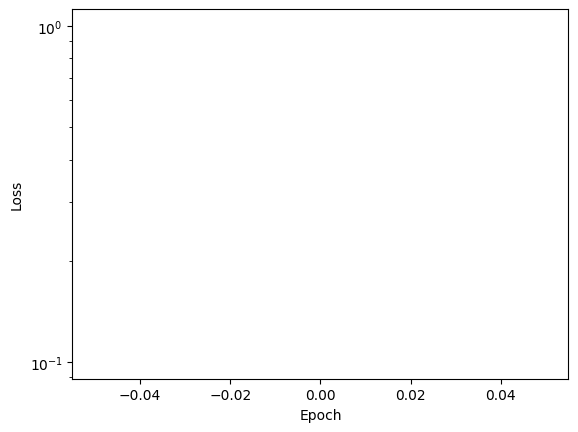

[0.6644536852836609]

In [7]:
# Create the training data
training_data = '. '.join([
'cats rule the world',
'dogs are the best','elephants have long trunks',
'monkeys like bananas',
'pandas eat bamboo',
'tigers are dangerous',
'zebras have stripes',
'lions are the kings of the savannah',
'giraffes have long necks',
'hippos are big and scary',
'rhinos have horns',
'penguins live in the arctic',
'polar bears are white'
])

with open("makedata/data.txt", 'r') as file:
    training_data = '. '.join([line.lower() for line in file.readlines()])
     
tokenized_and_padded_training_data = tokenize_and_pad_training_data(max_sequence_length, tokenizer, training_data)
sequences = create_training_sequences(max_sequence_length,
tokenized_and_padded_training_data)
# Train the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
trainer = Trainer(model, tokenizer, optimizer)
trainer.train(sequences, epochs=100, batch_size=20)

In [ ]:

with open("makedata/data.txt", 'r') as file:
    training_data = '. '.join([line for line in file.readlines()])

training_data

'Wingedsheep: Artificial Intelligence Blog\n. Building a text generation model from scratch\n. VINCENT BONS - 20 NOV 2022\n. Building a text generation model from scratch\n. The transformer is a neural network architecture that was proposed in the paper "Attention is All\n. You Need" by Ashish Vaswani, et al. in 2017. It is a powerful architecture that lead to many\n. state-of-the-art results in the last few years. It can be used to generate text (GPT-3), create\n. beautiful images from text (Imagen, Dall-e 2, Stable diffusion), compose music (music\n. transformer), speech-to-text (Whisper), understanding protein structure (AlphaFold), teaching\n. cars to drive themselves (Tesla FSD) or even learn to do many different tasks (Gato). There are\n. probably many amazing results I forgot to name, and many more to come.\n. Large language models (LLMs) are going to have a large impact in the future. We are probably\n. going to interact with these models a lot in the future to brainstorm, help

### Generate

In [21]:
max_tokens_to_generate = 50
generator = Generator(model, tokenizer)
generated_text = generator.generate(
max_tokens_to_generate=max_tokens_to_generate,
prompt="white",
padding_token=tokenizer.character_to_token('<pad>')
)
print(generated_text.replace('<pad>', ''))

white 


### Save model

In [ ]:
def save_checkpoint(self, path):
    print(f'Saving checkpoint {path}')
    torch.save({
    'number_of_tokens': self.number_of_tokens,
    'max_sequence_length': self.max_sequence_length,
    'embedding_dimension': self.embedding_dimension,
    'number_of_layers': self.number_of_layers,
    'number_of_heads': self.number_of_heads,
    'feed_forward_dimension': self.feed_forward_dimension,
    'dropout_rate': self.dropout_rate,
    'model_state_dict': self.state_dict()
    }, path)

@staticmethod
def load_checkpoint(path) -> 'LanguageModel':
    checkpoint = torch.load(path)
    model = LanguageModel(
    number_of_tokens=checkpoint['number_of_tokens'],
    max_sequence_length=checkpoint['max_sequence_length'],
    embedding_dimension=checkpoint['embedding_dimension'],number_of_layers=checkpoint['number_of_layers'],
    number_of_heads=checkpoint['number_of_heads'],
    feed_forward_dimension=checkpoint['feed_forward_dimension'],
    dropout_rate=checkpoint['dropout_rate']
    )
    model.load_state_dict(checkpoint['model_state_dict'])
    return model


# Since we use the AutoregressiveWrapper as convenience class, we can give this wrapper the
# save and load methods too.

def save_checkpoint(self, path):
    self.model.save_checkpoint(path)

@staticmethod
def load_checkpoint(path) -> 'AutoregressiveWrapper':
    model = LanguageModel.load_checkpoint(path)
    return AutoregressiveWrapper(model)

model.save_checkpoint('./trained_model')
model = model.load_checkpoint('./trained_model')

AttributeError: 'AutoregressiveWrapper' object has no attribute 'save_checkpoint'

### Run
